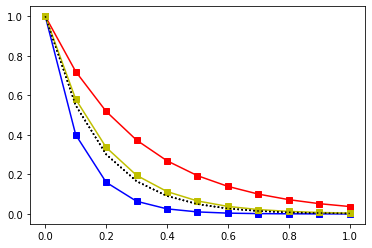

Text(0, 0.5, 'Error')

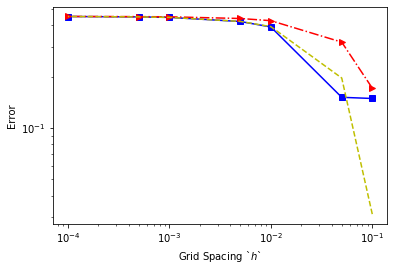

In [85]:
import numpy as np
import matplotlib.pyplot as plt

def ForwardEulerExample(y,h,k):
    y_new=y+h*(k*y)
    return y_new

def HuenExample(yold,h,k):
    Y=yold+h*(k*yold)
    y_new=yold+(h/2)*((k*yold)+Y)
    return y_new

def ExplicitMidpoint(yold,h,k):
    Y=yold+(h/2)*(k*yold)
    y_new=yold+h*(k*Y)
    return y_new

h=0.1
k=-6.0
y0=1.0
T=h*10#1.0


Nt=int(T/h)
t=np.linspace(0,T,Nt+1)
y_FE=np.zeros(Nt+1)
y_HE=np.zeros(Nt+1)
y_EM=np.zeros(Nt+1)
y_FE[0]=y0
y_HE[0]=y0
y_EM[0]=y0
for j in range(0,Nt): 
    y_FE[j+1]=ForwardEulerExample(y_FE[j],h,k)
    y_HE[j+1]=HuenExample(y_HE[j],h,k)
    y_EM[j+1]=ExplicitMidpoint(y_EM[j],h,k)
    
y_true=np.exp(k*t)
err_FE=abs(y_true-y_FE)
plt.plot(t,y_FE,'-sb',t,np.exp(k*t),':k')

err_HE=abs(y_true-y_HE)
plt.plot(t,y_HE,'-sr',t,np.exp(k*t),':k')

err_EM=abs(y_true-y_EM)
plt.plot(t,y_EM,'-sy',t,np.exp(k*t),':k')
plt.show()

#Error plotting
h=np.array([0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]);

err1=np.zeros(np.size(h))
err2=np.zeros(np.size(h))
err3=np.zeros(np.size(h))

for j in range(0,np.size(h)):
   
    err1[j]=abs(y_true[1]-ForwardEulerExample(y0,h[j],k)) # Error associated with F1 approx
    err2[j]=abs(y_true[1]-HuenExample(y0,h[j],k)) #  Error associated with F2 approx
    err3[j]=abs(y_true[1]-ExplicitMidpoint(y0,h[j],k)) #  Error associated with F3 approx

plt.loglog(h,err1,'-sb',h,err2,'-.>r',h,err3, '--y' )
plt.xlabel('Grid Spacing `$h$`')
plt.ylabel('Error')

<function matplotlib.pyplot.show(*args, **kw)>

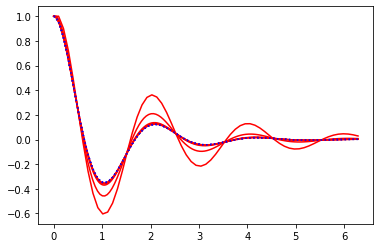

In [100]:
def fun2(y1,y2):
    f=-2*y2-10*y1
    return f

def Prob7(t,y1old,y2old,f,h):
    y1=y1old+h*y2old
    y2=y2old+h*f(y1old,y2old)
    return y1,y2

#h=np.array([0.1,0.05,0.01,0.005,0.001]);
T=2*np.pi

for j in range(0,np.size(h)):
    N=int(T/h[j])
    t=np.linspace(0,T,N+1)
    y1=np.zeros(N+1)
    y2=np.zeros(N+1)
    y1[0]=1
    y2[0]=0
    for i in range(0,N):
        y1[i+1],y2[i+1]= Prob7(t,y1[i],y2[i],fun2,h[j])
    y_true=np.exp(-t)*(np.cos(3*t)+(1/3)*np.sin(3*t))
    plt.plot(t,y1,'-r',t,y_true,':b')
plt.show

In [91]:
T

6.283185307179586

In [92]:
N

6283